<a href="https://colab.research.google.com/github/AnalyzrXs/Credit-Card-Fraud-Detection-/blob/main/crea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Fraud Detection Using ML**

In [ ]:
!pip install imbalanced-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


**Data Loading & Initial Setup**

In [ ]:
data = pd.read_csv("/content/creditcard_2023.csv")

 Data Preprocessing

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32045,36618,-0.459544,0.855089,1.439287,-0.124567,0.384863,-0.696889,1.096384,-0.331837,-0.365268,...,-0.189169,-0.336101,-0.055155,0.031603,-0.238460,0.110213,0.148392,-0.029674,36.28,0.0
32046,36618,-2.384173,-1.607310,1.395001,-0.276537,2.122708,-2.912816,-0.110351,-0.107068,-0.592865,...,0.244384,-0.207908,0.256291,0.747328,0.612755,0.977327,-0.205855,0.085152,74.34,0.0
32047,36618,-0.721137,0.853178,1.299399,-0.598901,0.260091,-1.081745,1.402333,-0.276401,-0.780582,...,0.061711,0.014160,-0.139496,0.432280,0.316156,0.310431,-0.028257,0.085434,69.90,0.0
32048,36618,0.658758,-1.271042,0.674554,0.964178,-1.338198,-0.035772,-0.250317,-0.061959,-0.773969,...,-0.141819,-0.398868,-0.177090,0.406598,0.246304,-0.360810,0.036561,0.087724,305.24,0.0
32049,36619,1.268316,-0.879452,0.948478,-0.775127,-1.387950,0.040584,-1.278641,0.291133,-0.470477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = data.copy()


In [ ]:
scaler = StandardScaler()

df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_time'] = scaler.fit_transform(df[['Time']])

df.drop(['Amount', 'Time'], axis=1, inplace=True)


Feature and Target Separation

In [ ]:
X = df.drop(columns='Class')
y = df['Class']


In [ ]:
data['Class'].value_counts()


,count
Class,
0.0,31947
1.0,102


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

df = df.dropna(subset=['Class'])


Training set size: (22434, 30), Testing set size: (9615, 30)
Fraud cases in train set: 71.0, legit: 22363.0


Train-Test Split

In [ ]:

X = df.drop(columns='Class')
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")
print(f"Fraud cases in train set: {sum(y_train)}, legit: {len(y_train) - sum(y_train)}")

Handling Class Imbalance Using SMOTE: SMOTE generates synthetic fraud examples to balance the dataset.

In [ ]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print(f"Resampled dataset size: {X_resampled.shape}")
print(f"Resampled fraud cases: {sum(y_resampled)}, legit: {len(y_resampled) - sum(y_resampled)}")


Resampled dataset size: (44726, 30)
Resampled fraud cases: 22363.0, legit: 22363.0


Model Training & Evaluation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score

This train_and_evaluate_models function is designed to train three popular machine learning models—Logistic Regression, Random Forest, and XGBoost—on resampled data that has been balanced using SMOTE to handle the class imbalance between fraudulent and legitimate transactions. For each model, the function trains using the balanced training data and then tests its ability to predict fraud using a separate test set. It calculates key evaluation metrics such as the F1 Score (which balances precision and recall), ROC AUC Score (which measures how well the model separates fraud from non-fraud), and produces a detailed classification report and confusion matrix to show correct and incorrect predictions.



*  F1 Score: Balance between precision and recall.
*   ROC AUC: Model's ability to distinguish between classes.
*   Confusion Matrix: Breakdown of predicted vs actual values







In [ ]:
# Train and Evaluate Models
def train_and_evaluate_models(X_resampled, y_resampled, X_test, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    }

    results = []

    for name, model in models.items():
        # Train model
        model.fit(X_resampled, y_resampled)

        # Predictions
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC AUC

        # Evaluate performance
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba)
        report = classification_report(y_test, y_pred, digits=4)
        cm = confusion_matrix(y_test, y_pred)

        results.append({
            "Model": name,
            "F1 Score": f1,
            "ROC AUC": roc_auc,
            "Classification Report": report,
            "Confusion Matrix": cm
        })


        print(f"\n🔍 {name}")
        print(f"Classification Report:\n{report}")
        print(f"ROC AUC: {roc_auc:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # Confusion Matrix Visualization
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
        plt.title(f'{name} - Confusion Matrix')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()

    return results



🔍 Logistic Regression
Classification Report:
              precision    recall  f1-score   support

         0.0     0.9998    0.9869    0.9933      9584
         1.0     0.1871    0.9355    0.3118        31

    accuracy                         0.9867      9615
   macro avg     0.5934    0.9612    0.6526      9615
weighted avg     0.9972    0.9867    0.9911      9615

ROC AUC: 0.9856
F1 Score: 0.3118
Confusion Matrix:
[[9458  126]
 [   2   29]]


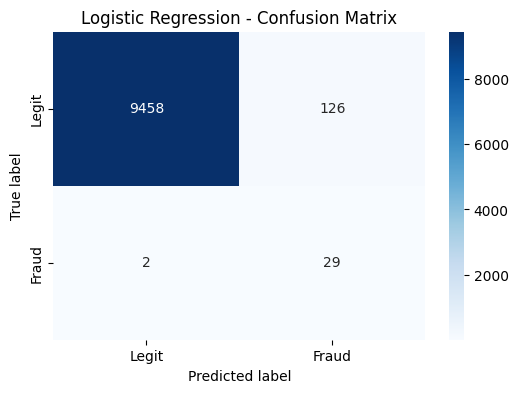


🔍 Random Forest
Classification Report:
              precision    recall  f1-score   support

         0.0     0.9995    0.9996    0.9995      9584
         1.0     0.8667    0.8387    0.8525        31

    accuracy                         0.9991      9615
   macro avg     0.9331    0.9191    0.9260      9615
weighted avg     0.9991    0.9991    0.9991      9615

ROC AUC: 0.9806
F1 Score: 0.8525
Confusion Matrix:
[[9580    4]
 [   5   26]]


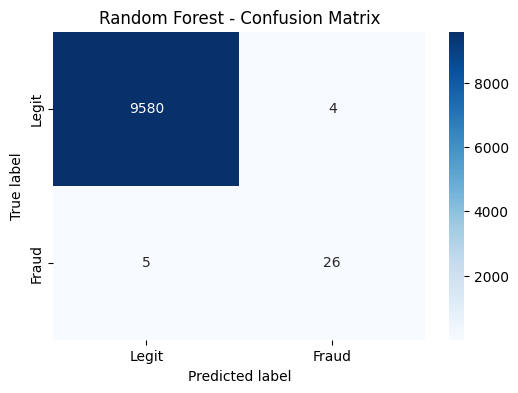

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:33:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔍 XGBoost
Classification Report:
              precision    recall  f1-score   support

         0.0     0.9995    0.9995    0.9995      9584
         1.0     0.8387    0.8387    0.8387        31

    accuracy                         0.9990      9615
   macro avg     0.9191    0.9191    0.9191      9615
weighted avg     0.9990    0.9990    0.9990      9615

ROC AUC: 0.9957
F1 Score: 0.8387
Confusion Matrix:
[[9579    5]
 [   5   26]]


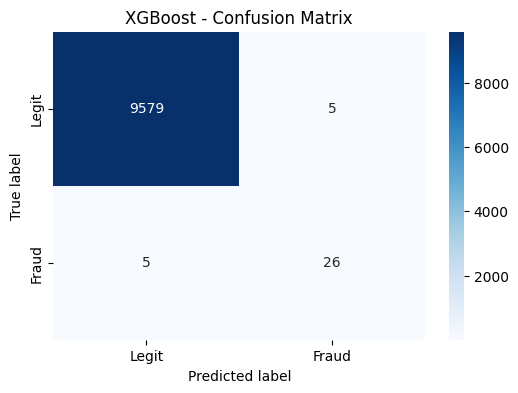

In [ ]:
results = train_and_evaluate_models(X_resampled, y_resampled, X_test, y_test)


In [ ]:
results_df = pd.DataFrame(results)

results_df = results_df[['Model', 'F1 Score', 'ROC AUC']]
print(results_df.sort_values(by='ROC AUC', ascending=False))


                 Model  F1 Score   ROC AUC
2              XGBoost  0.838710  0.995692
0  Logistic Regression  0.311828  0.985628
1        Random Forest  0.852459  0.980561


 Select and Save Best Model

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
import os
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

os.makedirs("models", exist_ok=True)

best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_resampled, y_resampled)

# Save model
joblib.dump(best_model, "models/fraud_detection_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")  # Save scaler for future predictions

print("✅ Model and scaler saved successfully!")

✅ Model and scaler saved successfully!


In [ ]:
loaded_model = joblib.load("models/fraud_detection_model.pkl")
loaded_scaler = joblib.load("models/scaler.pkl")

new_data = pd.DataFrame({
    'V1': [0.1], 'V2': [0.2], 'V3': [0.3], 'V4': [0.4], 'V5': [0.5], 'V6': [0.6], # include all V features
    'V7': [0.7], 'V8': [0.8], 'V9': [0.9], 'V10': [1.0], 'V11': [1.1], 'V12': [1.2],
    'V13': [1.3], 'V14': [1.4], 'V15': [1.5], 'V16': [1.6], 'V17': [1.7], 'V18': [1.8],
    'V19': [1.9], 'V20': [2.0], 'V21': [2.1], 'V22': [2.2], 'V23': [2.3], 'V24': [2.4],
    'V25': [2.5], 'V26': [2.6], 'V27': [2.7], 'V28': [2.8],
    'scaled_amount': [1000], 'scaled_time': [0.5]
})

prediction = loaded_model.predict(new_data)
probability = loaded_model.predict_proba(new_data)[:, 1]

print(f"Fraud prediction: {prediction[0]}")
print(f"Fraud probability: {probability[0]:.4f}")

Fraud prediction: 0.0
Fraud probability: 0.0200
